In [1]:
#DecisionTree 파이썬 코드 실습

#모델의 성능을 평가하기 위한 패키지
#classification_report: 주요 분류 측정 항목을 보여주는 보고서 모듈
#confusion_matrix: 분류의 정확성을 평가하기 위한 오차행렬 계산 모듈
from sklearn.metrics import classification_report, confusion_matrix

#데이터셋을 train과 test로 분리할 서브패키지
from sklearn.model_selection import train_test_split

#의사결정 트리 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#IPython 내의 정보를 보여주는 도구용 공용 API
#Image: raw 데이터가 있는 png, jpeg 이미지 객체를 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

#os와 상호작용하기 위한 기본 기능이 제공되는 모듈
import os

In [2]:
#PATH 환경변수에 C:/machine_learning_project01/Graphviz/bin 추가
os.environ["PATH"] = os.environ["PATH"] + ";C:/machine_learning_project01/Graphviz/bin;"

In [3]:
#playtennis.cvs 파일을 읽어온 뒤 데이터프레임 형식으로 변환
tennis_data = pd.read_csv('playtennis.csv')

In [4]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)



tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 1)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 2)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 3)


tennis_data.Humidity = tennis_data.Humidity.replace('High', 1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 2)


tennis_data.Wind = tennis_data.Wind.replace('Weak', 1)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 2)


tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 2)
tennis_data

C:\Users\User\AppData\Local\Temp\ipykernel_4008\2422675233.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)
C:\Users\User\AppData\Local\Temp\ipykernel_4008\2422675233.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 3)
C:\Users\User\AppData\Local\Temp\ipykernel_4008\2422675233.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [5]:
#tennis_data의 컬럼 값들을 데이터프레임 형태로 추출하고
#추출한 데이터를 np.array 형태로 변환한 뒤 변수 X, y에 저장
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [6]:
#X와 y의 데이터를 train과 test로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
#의사결정나무 분류 모듈을 dt_clf에 저장
dt_clf = DecisionTreeClassifier()

In [8]:
#의사결정나무 분류 모듈에 X_train, y_train 입력
dt_clf = dt_clf.fit(X_train, y_train)

In [9]:
#X_test에 대한 예측값을 dt_prediction에 저장
dt_prediction = dt_clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

#예측값의 정확도를 측정
accuracy = accuracy_score(y_test, dt_prediction)
print("정확도: ", accuracy)

정확도:  0.5


In [11]:
#tennis.data의 컬럼을 list로 변환
feature_names = tennis_data.columns.tolist()

#0:4로 슬라이싱하여 Outlook, Temperature, Humidity, Wind 컬럼을 추출
feature_names = feature_names[0:4]

In [12]:
#트리 표현 함수(tree.export_graphviz())에 입력되는 파라미터 중 하나인
#class_names에 값을 입력하기 위해 target class값을 배열형태로 저장
target_name = np.array(['Play No', 'Play Yes'])

In [13]:
#export_graphviz(): 의사결정트리를 dot형식으로 내보내는 함수
#dt_clf: 의사결정트리 분류기
#out_file: 의사결정트리를  파일 또는 문자열로 반환(기본: tree.dot, None일 경우 문자열)
#feature_names: 각 feature의 이름(문자열)
#class_names: 각 대상 클래스의 이름을 오름차순으로 정렬
#filled: True일 경우 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠
#rounded: True일 경우 둥근 모서리가 있는 노드 상자를 그림
#special_characters: True일 경우 특수문자 표시
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [14]:
#dot 데이터로 정의된 그래프를 로드하고 dt_graph에 저장
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

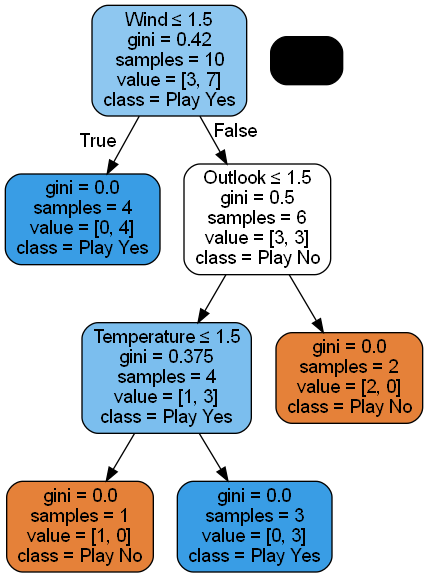

In [15]:
#그래프를 png파일로 생성한 뒤 이미지 객체를 통해 그래프로 표현
Image(dt_graph.create_png())

In [21]:
#다음 날씨에 테니스를 칠 가능성이 높을지 낮을지 예측 결과 확인하기

#Outlook-Sunny, Temperature-Hot, Humidity-High, Wind-Weak
arr = np.array([[0, 1, 2, 1]])

#의사결정나무에 결과 질의(1: No, 2: Yes)
print("예측값=", dt_clf.predict(arr))

예측값= [2]
